## USA House Price Prediction

### Problem Statement
- In the ever-evolving real estate market, accurately predicting property prices is essential for buyers, sellers, and investors. House prices are influenced by various factors such as location, size, condition, and amenities. Understanding these factors can provide valuable insights into market trends and help stakeholders make informed decisions.

### Expected Outcome
- The expected outcome of this project is a machine learning model that can accurately predict property prices based on the provided dataset. The model should offer valuable insights into the factors driving property prices, helping stakeholders make informed real estate decisions.

Dataset: https://www.kaggle.com/datasets/fratzcan/usa-house-prices
contains 18 columns and 4140 rows

### Importing Data and Required packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/USA Housing Dataset.csv')
pd.options.display.max_columns = None

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


### Data checks
- Check Missing values
- Check Duplicates
- Check data type
- Check no. of unique values of each column
- Check distribution of data set
- Check categories present for the categorical columns

In [4]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [7]:
df.nunique()

date               68
price            1625
bedrooms            9
bathrooms          24
sqft_living       549
sqft_lot         2856
floors              6
waterfront          2
view                5
condition           5
sqft_above        491
sqft_basement     205
yr_built          115
yr_renovated       60
street           4079
city               43
statezip           77
country             1
dtype: int64

In [8]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357
std,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000
75%,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000


- The mean are approx. 3 for bedrooms, 2 for bathrooms and 1.5 for floors
- SD is around 1 , 1 and 0.5 respectively
- Minimum are 0 bedroom, 0 bathrooms and 1 floors

In [9]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 13 numerical features : ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

We have 5 categorical features : ['date', 'street', 'city', 'statezip', 'country']


### What is the distribution of house prices?

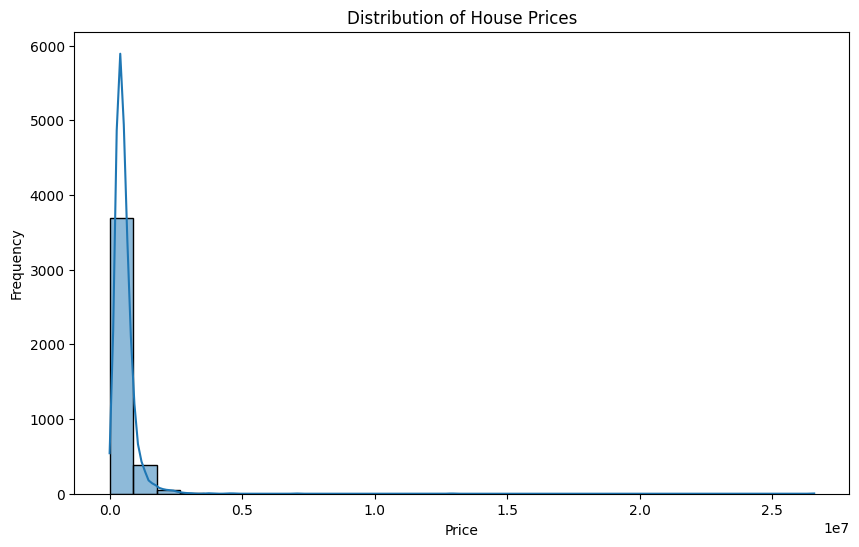

In [30]:
# Univariate Analysis
# Function to plot univariate distributions
def plot_univariate_distribution(data, column, title, xlabel):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.show()

# Plotting univariate distributions
plot_univariate_distribution(df, 'price', 'Distribution of House Prices', 'Price')


#### Findings
The histogram is heavily right-skewed, indicating that most of the house prices are clustered at the lower end of the price spectrum. This skewness suggests that while a majority of houses are relatively affordable, there are a few houses with much higher prices. <br />
There is a long tail extending towards the higher price ranges, implying the presence of some very high-priced properties. This could represent luxury or high-value real estate in the dataset. <br />
The highest frequency of houses falls in the lower price range, which could be typical of a general real estate market where entry-level and moderately priced homes are more common. <br />
The presence of a tail at the higher end might also indicate outliers or special cases of extremely high-priced properties. This could include mansions, luxury estates, or properties in highly desirable areas.

### How are the bedrooms distributed?

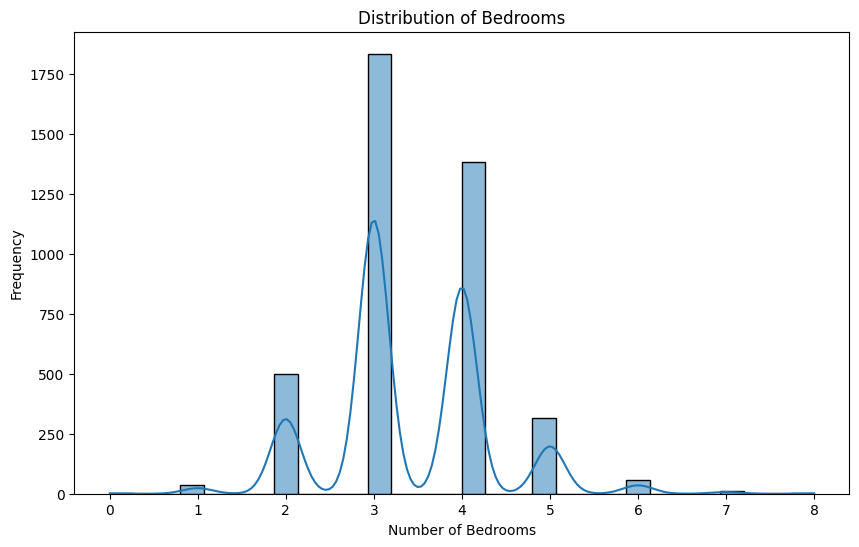

In [31]:
plot_univariate_distribution(df, 'bedrooms', 'Distribution of Bedrooms', 'Number of Bedrooms')

#### Findings
The graph shows that the most frequent number of bedrooms is 3, with a significantly high frequency compared to other bedroom counts. <br />
The distribution is right-skewed, meaning there's a longer tail towards higher numbers of bedrooms. This indicates that while most properties have a smaller number of bedrooms, there are some properties with a considerably larger number of bedrooms. <br />
The data includes properties with a bedroom count ranging from 0 to 8.

### How are the bathrooms distributed?

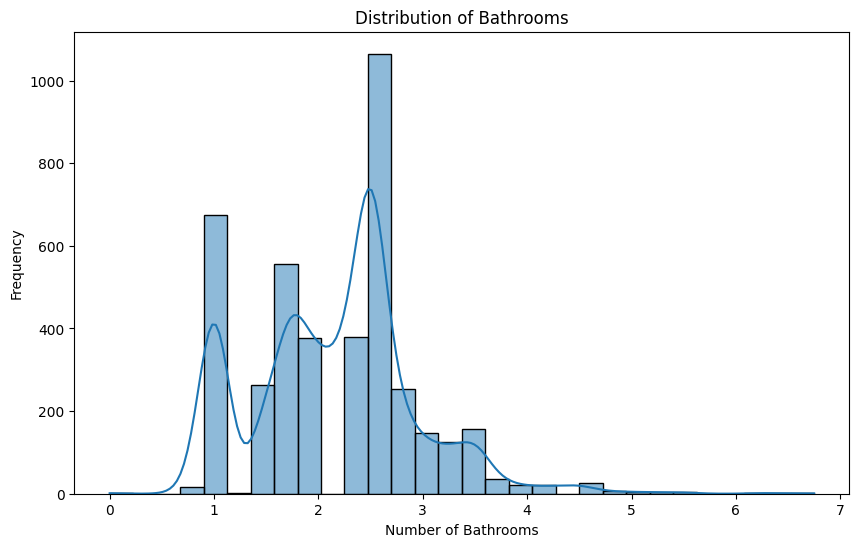

In [32]:
plot_univariate_distribution(df, 'bathrooms', 'Distribution of Bathrooms', 'Number of Bathrooms')

#### Findings
The most common number of bathrooms in properties appears to be around 2 to 3, as indicated by the peaks in the histogram. This range could be considered the standard for most homes.  <br />
The distribution shows a right skew, though less pronounced than the house prices distribution. Few properties have more than 4 bathrooms, indicating that higher bathroom counts are less common and could be associated with larger or more luxurious homes.  <br />
The mode of the distribution (the most frequent value) is around 2 bathrooms, suggesting that this is the most typical configuration in the dataset.  <br />
The frequency of properties decreases significantly as the number of bathrooms increases beyond 3. This decrease is rapid and suggests that properties with more than 4 bathrooms are quite rare, potentially limited to high-end real estate.

### What is the distribution of Living Area (sqft)?

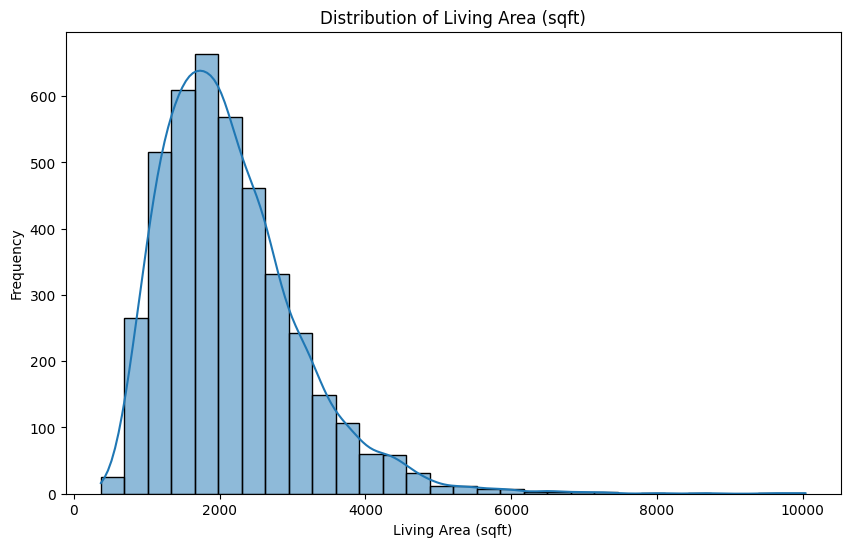

In [33]:
plot_univariate_distribution(df, 'sqft_living', 'Distribution of Living Area (sqft)', 'Living Area (sqft)')


#### Findings
The distribution of living area is right-skewed, with a long tail towards larger square footages. This indicates that most properties have smaller living areas, while a smaller proportion of properties have significantly larger living spaces.   <br />
A single peak around the 1,500 sqft range. This suggests that the majority of properties in the dataset have living areas clustered around this value. <br />
The data suggests that most properties have living areas between 1,000 and 2,500 sqft, with a smaller proportion of properties having significantly larger living spaces.

### How are the number of floors distributed?

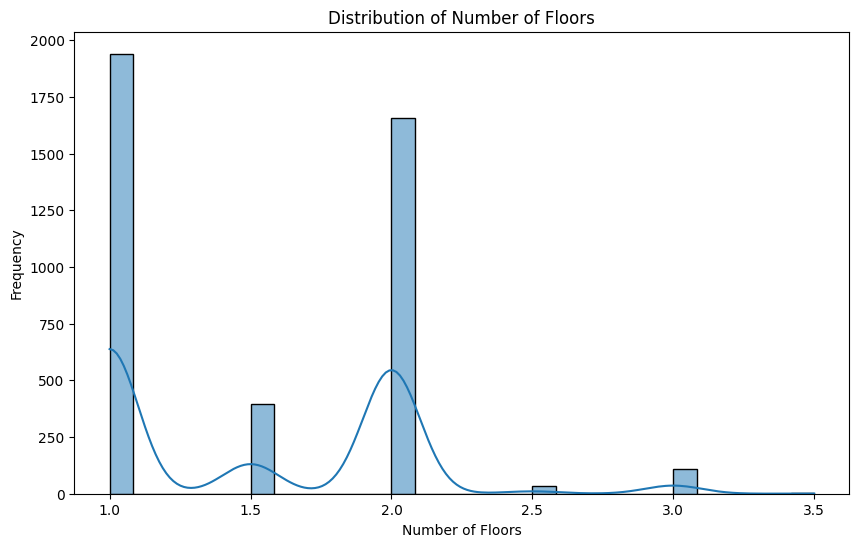

In [34]:
plot_univariate_distribution(df, 'floors', 'Distribution of Number of Floors', 'Number of Floors')


#### Findings
The distribution of the number of floors is right-skewed, with a long tail towards higher floor numbers. This indicates that most buildings have a smaller number of floors, while a smaller proportion of buildings have significantly more floors.  <br /> 
With two distinct peaks. One peak is around 1.0 floors, and the other is around 2.0 floors. This suggests that there might be two distinct groups of buildings in terms of their number of floors.

### What is the distribution of view quality?

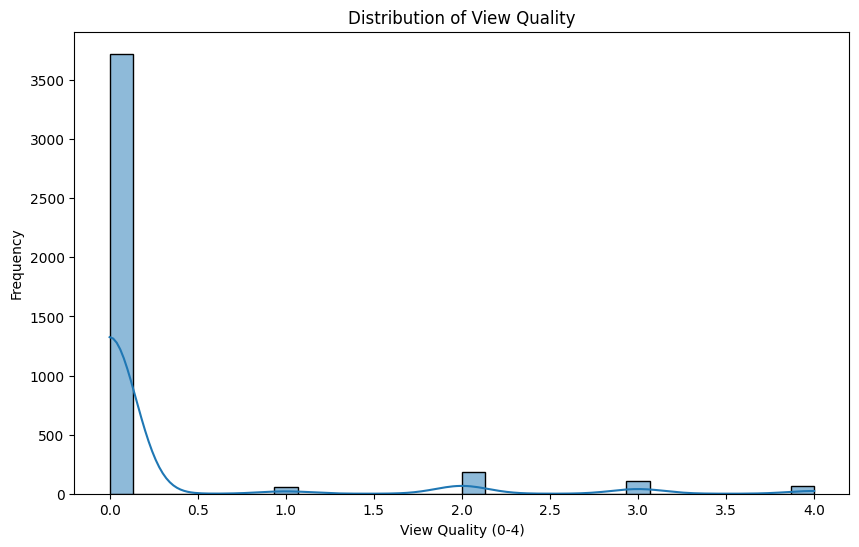

In [35]:
plot_univariate_distribution(df, 'view', 'Distribution of View Quality', 'View Quality (0-4)')


#### Findings
The distribution of view quality is right-skewed, with a long tail towards higher view quality scores. This indicates that most properties have a lower view quality, while a smaller proportion of properties have significantly higher view quality scores. <br />
With two distinct peaks. One peak is around 0.0 view quality, followed by 2.0 view quality. This suggests that there might be two distinct groups of properties in terms of their view quality. <br />
The presence of properties with a view quality of 0 might indicate properties without a view or with obstructed views.

### What is the distribution of property condition?

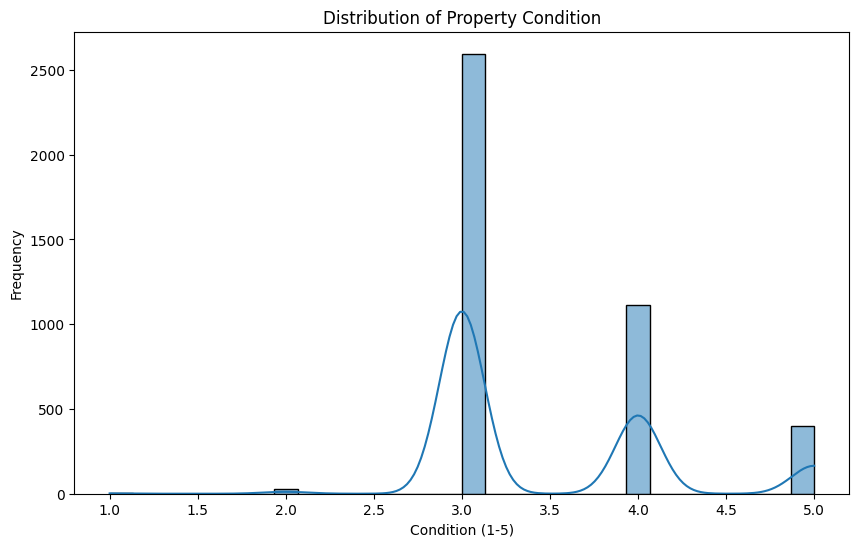

In [36]:
plot_univariate_distribution(df, 'condition', 'Distribution of Property Condition', 'Condition (1-5)')

#### Findings
Condition rating with 3.0 houses dominate the market followed by 4.0 and then 5.0. <br />
The dataset primarily consists of properties in fair to good or good to excellent condition. <br />
There is a smaller proportion of properties in poorer condition (ratings below 3.0)

### What is the relationship between living area and price?

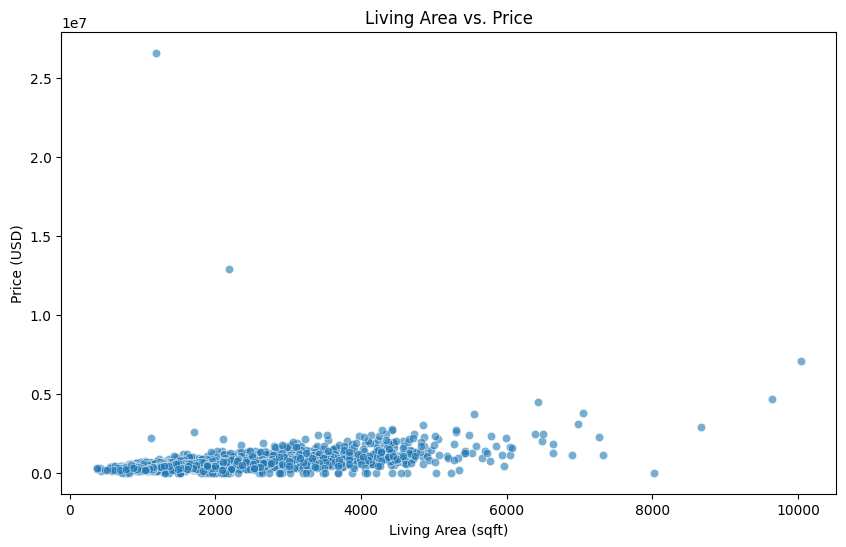

In [37]:
# Bivariate Analysis
# Function to plot bivariate relationships
def plot_bivariate_relationship(data, x_column, y_column, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[x_column], y=data[y_column], alpha=0.6)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Plotting bivariate relationships
plot_bivariate_relationship(df, 'sqft_living', 'price', 'Living Area vs. Price', 'Living Area (sqft)', 'Price (USD)')


#### Findings
The scatter plot of living area versus house price shows a general positive correlation where larger living areas tend to correlate with higher prices. However, there are notable outliers with high prices that are not the largest homes, suggesting that other factors like location or unique features also significantly impact prices. <br />
The plot indicates a concentration of more affordable, smaller homes, and a wider price range among larger homes, which might reflect varying quality or location.

### How does the number of bedrooms relate to price?

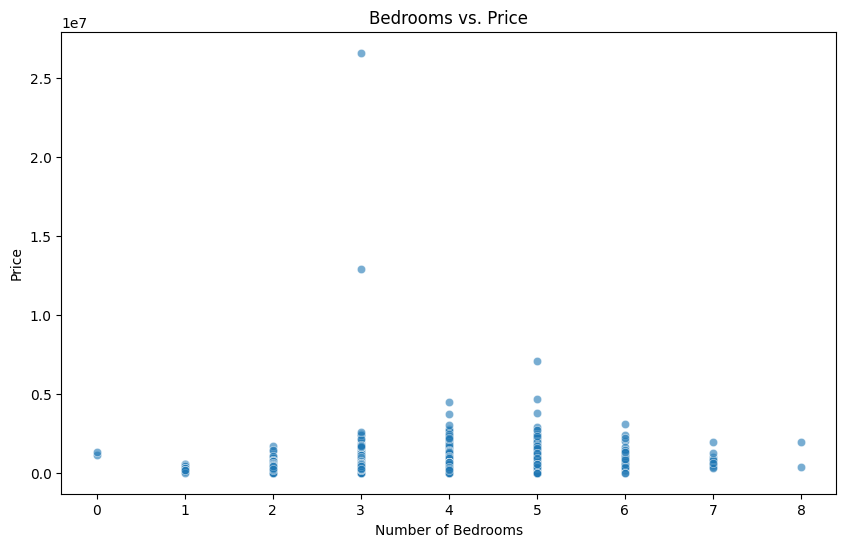

In [38]:
plot_bivariate_relationship(df, 'bedrooms', 'price', 'Bedrooms vs. Price', 'Number of Bedrooms', 'Price')


#### Findings
The scatterplot reveals a positive correlation between the number of bedrooms and price. This means that as the number of bedrooms increases, the property price tends to increase as well.<br />
Prices go up as the no. of bedrooms increases, but some outliers can be seen for 3 bedroom houses which is because of the same reason as above. 

### What is the effect of bathrooms on price?

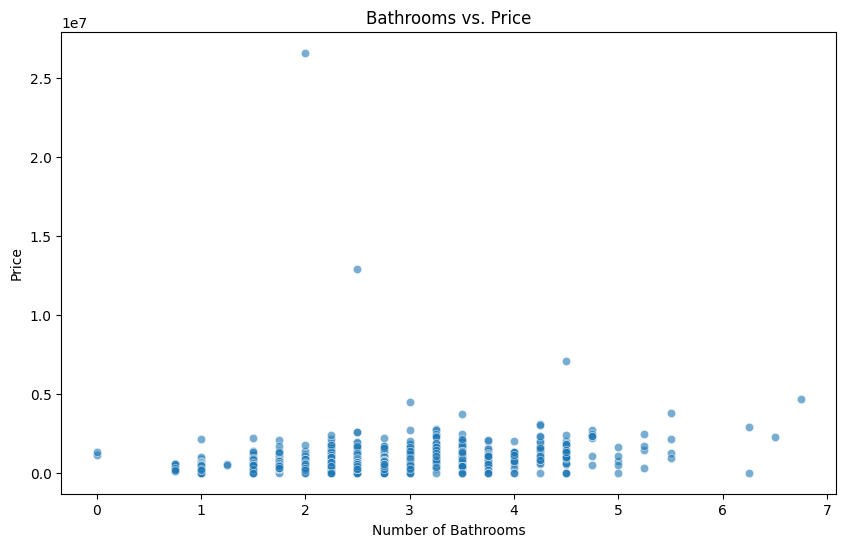

In [39]:
plot_bivariate_relationship(df, 'bathrooms', 'price', 'Bathrooms vs. Price', 'Number of Bathrooms', 'Price')

#### Findings
Similar correlation is found with the bathrooms as well.

### How does the number of floors affect the price?

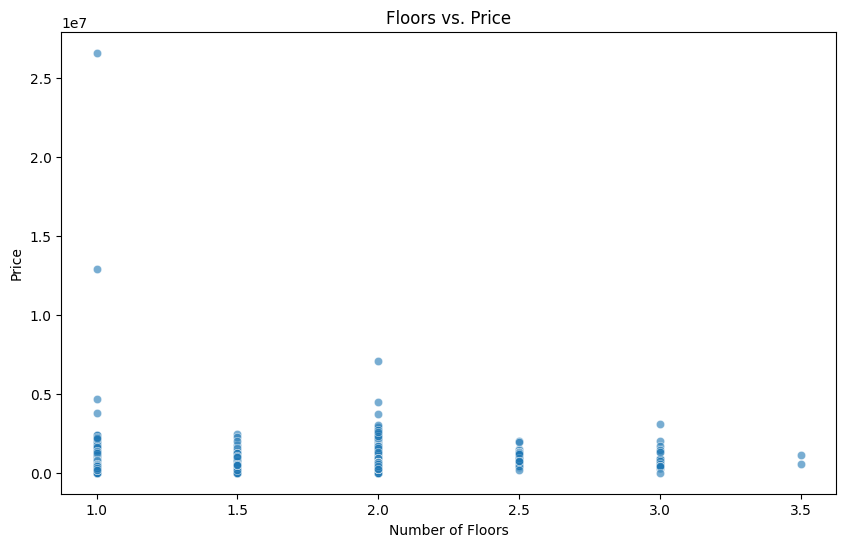

In [40]:
plot_bivariate_relationship(df, 'floors', 'price', 'Floors vs. Price', 'Number of Floors', 'Price')

#### Findings
The majority of houses with 1 to 2 floors are clustered at lower price ranges. This suggests that the typical house with fewer floors tends to be more affordable. <br />
There are a few outliers, particularly among houses with 1 and 2 floors, where prices are significantly higher. These could represent luxury properties or those located in highly desirable areas. <br />
The number of floors alone does not seem to be a strong predictor of house price. Properties with more floors do not consistently show higher prices, indicating that other factors such as location, size, and amenities may have a stronger influence. <br />
The number of floors has a weak correlation with house price, with more significant price variation driven by other factors.

### How does view quality influence price?

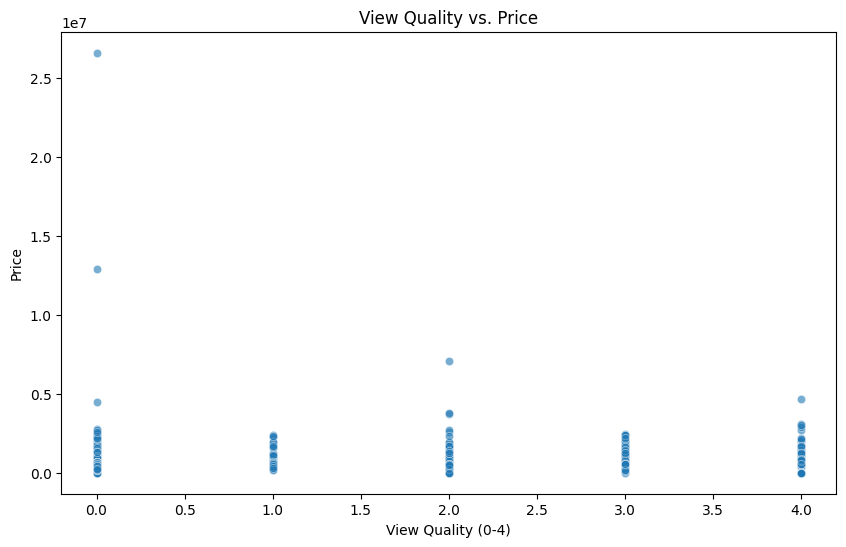

In [41]:
plot_bivariate_relationship(df, 'view', 'price', 'View Quality vs. Price', 'View Quality (0-4)', 'Price')

#### Findings
Properties with lower view quality ratings (0 to 2) show prices mostly concentrated at lower levels. As view quality increases (3 and 4), there are still many properties with lower prices, suggesting that view quality alone does not dictate high prices. <br />
A few outliers exist where properties with view quality ratings of 0, 2, and 4 have significantly higher prices. These could be premium properties in prime locations or with other luxury features. <br />
The spread of prices across different view quality ratings suggests that view quality has a weak correlation with property prices. While better views might contribute to higher prices, other factors are likely more influential. <br />
View quality alone is not a strong determinant of house prices, though it can contribute to higher valuations in certain cases.

### What is the relationship between property condition and price?

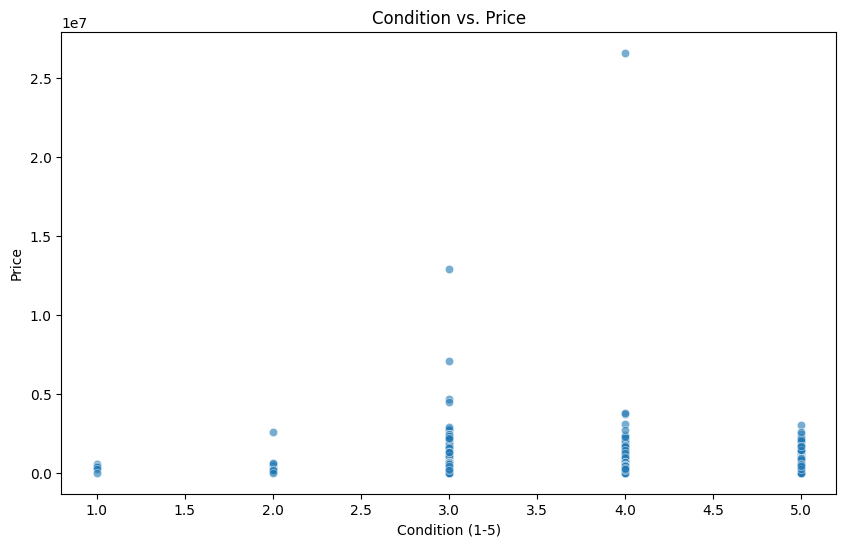

In [42]:
plot_bivariate_relationship(df, 'condition', 'price', 'Condition vs. Price', 'Condition (1-5)', 'Price')

#### Findings
The prices are spread across all condition ratings, with the majority of properties clustered in the lower price range, irrespective of condition. This indicates that condition alone does not drastically impact most property prices. <br />
There are a few high-priced outliers in conditions rated 3, 4, and 5. These suggest that properties in better conditions can achieve higher prices, but other factors likely contribute to these price spikes. <br />
Similar to view quality, the condition rating appears to have a weak correlation with price. While better condition might slightly elevate property prices, it's not a definitive factor for high valuations. <br />
Property condition has a moderate effect on prices, with some better-condition properties commanding higher prices, but the overall influence appears limited.

### How does being located on the waterfront (yes/no) affect property prices?

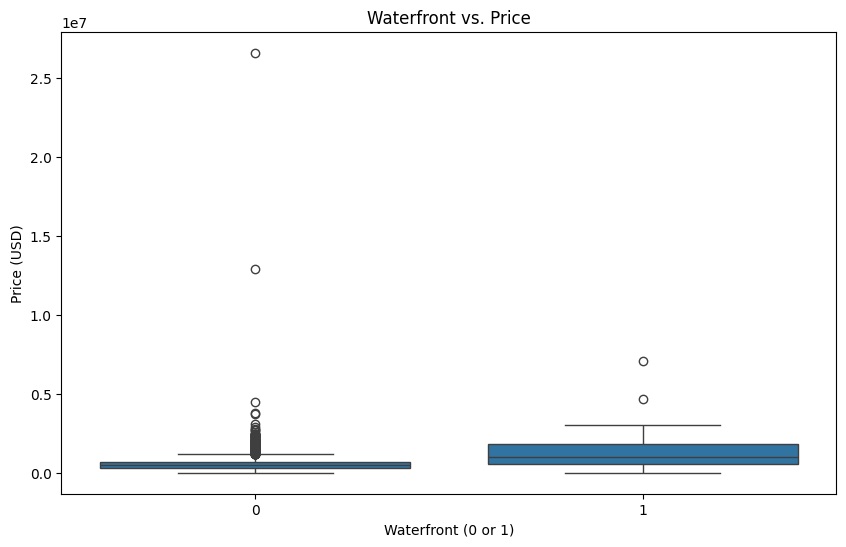

In [43]:
# Additional bivariate analysis using categorical data
def plot_boxplot(data, x_column, y_column, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[x_column], y=data[y_column])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Boxplots for categorical variables
plot_boxplot(df, 'waterfront', 'price', 'Waterfront vs. Price', 'Waterfront (0 or 1)', 'Price (USD)')

#### Findings
The median price for properties without waterfront access (0) is significantly lower than for those with waterfront access (1). This suggests that waterfront properties are generally more expensive.

The distribution of prices for non-waterfront properties (0) is skewed to the right, with a longer tail towards higher prices. This indicates that there are some significantly more expensive non-waterfront properties compared to the majority. <br />
The distribution of prices for waterfront properties (1) is also slightly skewed to the right, but less pronounced than for non-waterfront properties.

There are a few outlier data points, representing properties with exceptionally high prices compared to others in their respective categories (with or without waterfront access).

Waterfront access has a substantial impact on property prices in this dataset. <br />
There is a wider range of prices for non-waterfront properties compared to waterfront properties. <br />
The presence of outliers suggests that there might be additional factors influencing property prices beyond just waterfront access.

### What is the impact of property condition on prices?

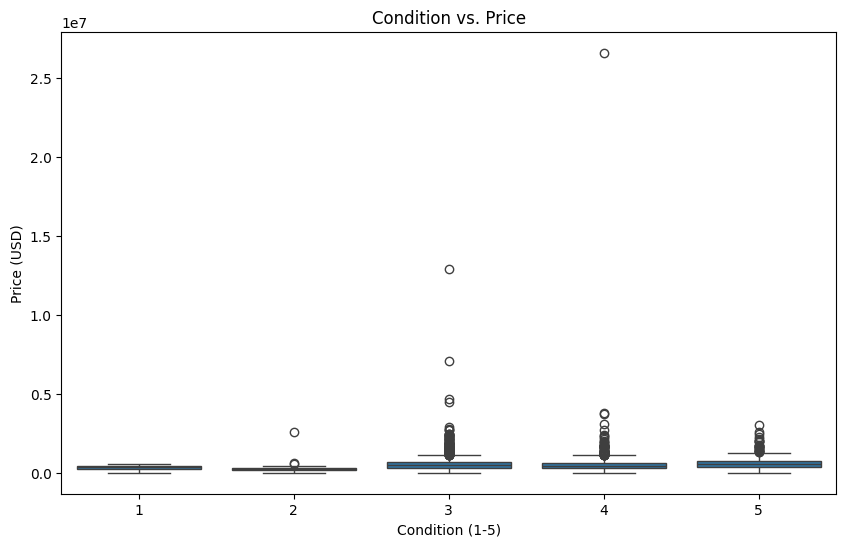

In [44]:
plot_boxplot(df, 'condition', 'price', 'Condition vs. Price', 'Condition (1-5)', 'Price (USD)')

#### Findings
The median price increases as the condition of the property improves. This suggests that the condition of a property significantly impacts its price.

The distribution of prices for each condition category is skewed to the right, with a longer tail towards higher prices. This indicates that there are some significantly more expensive properties in each condition category compared to the majority.

There are a few outlier data points, representing properties with exceptionally high prices compared to others in their respective condition categories.

The condition of a property is a strong predictor of its price in this dataset. <br />
There is a wider range of prices for properties in poorer condition (lower numbers) compared to those in better condition (higher numbers). <br />
The presence of outliers suggests that there might be additional factors influencing property prices beyond just the condition.

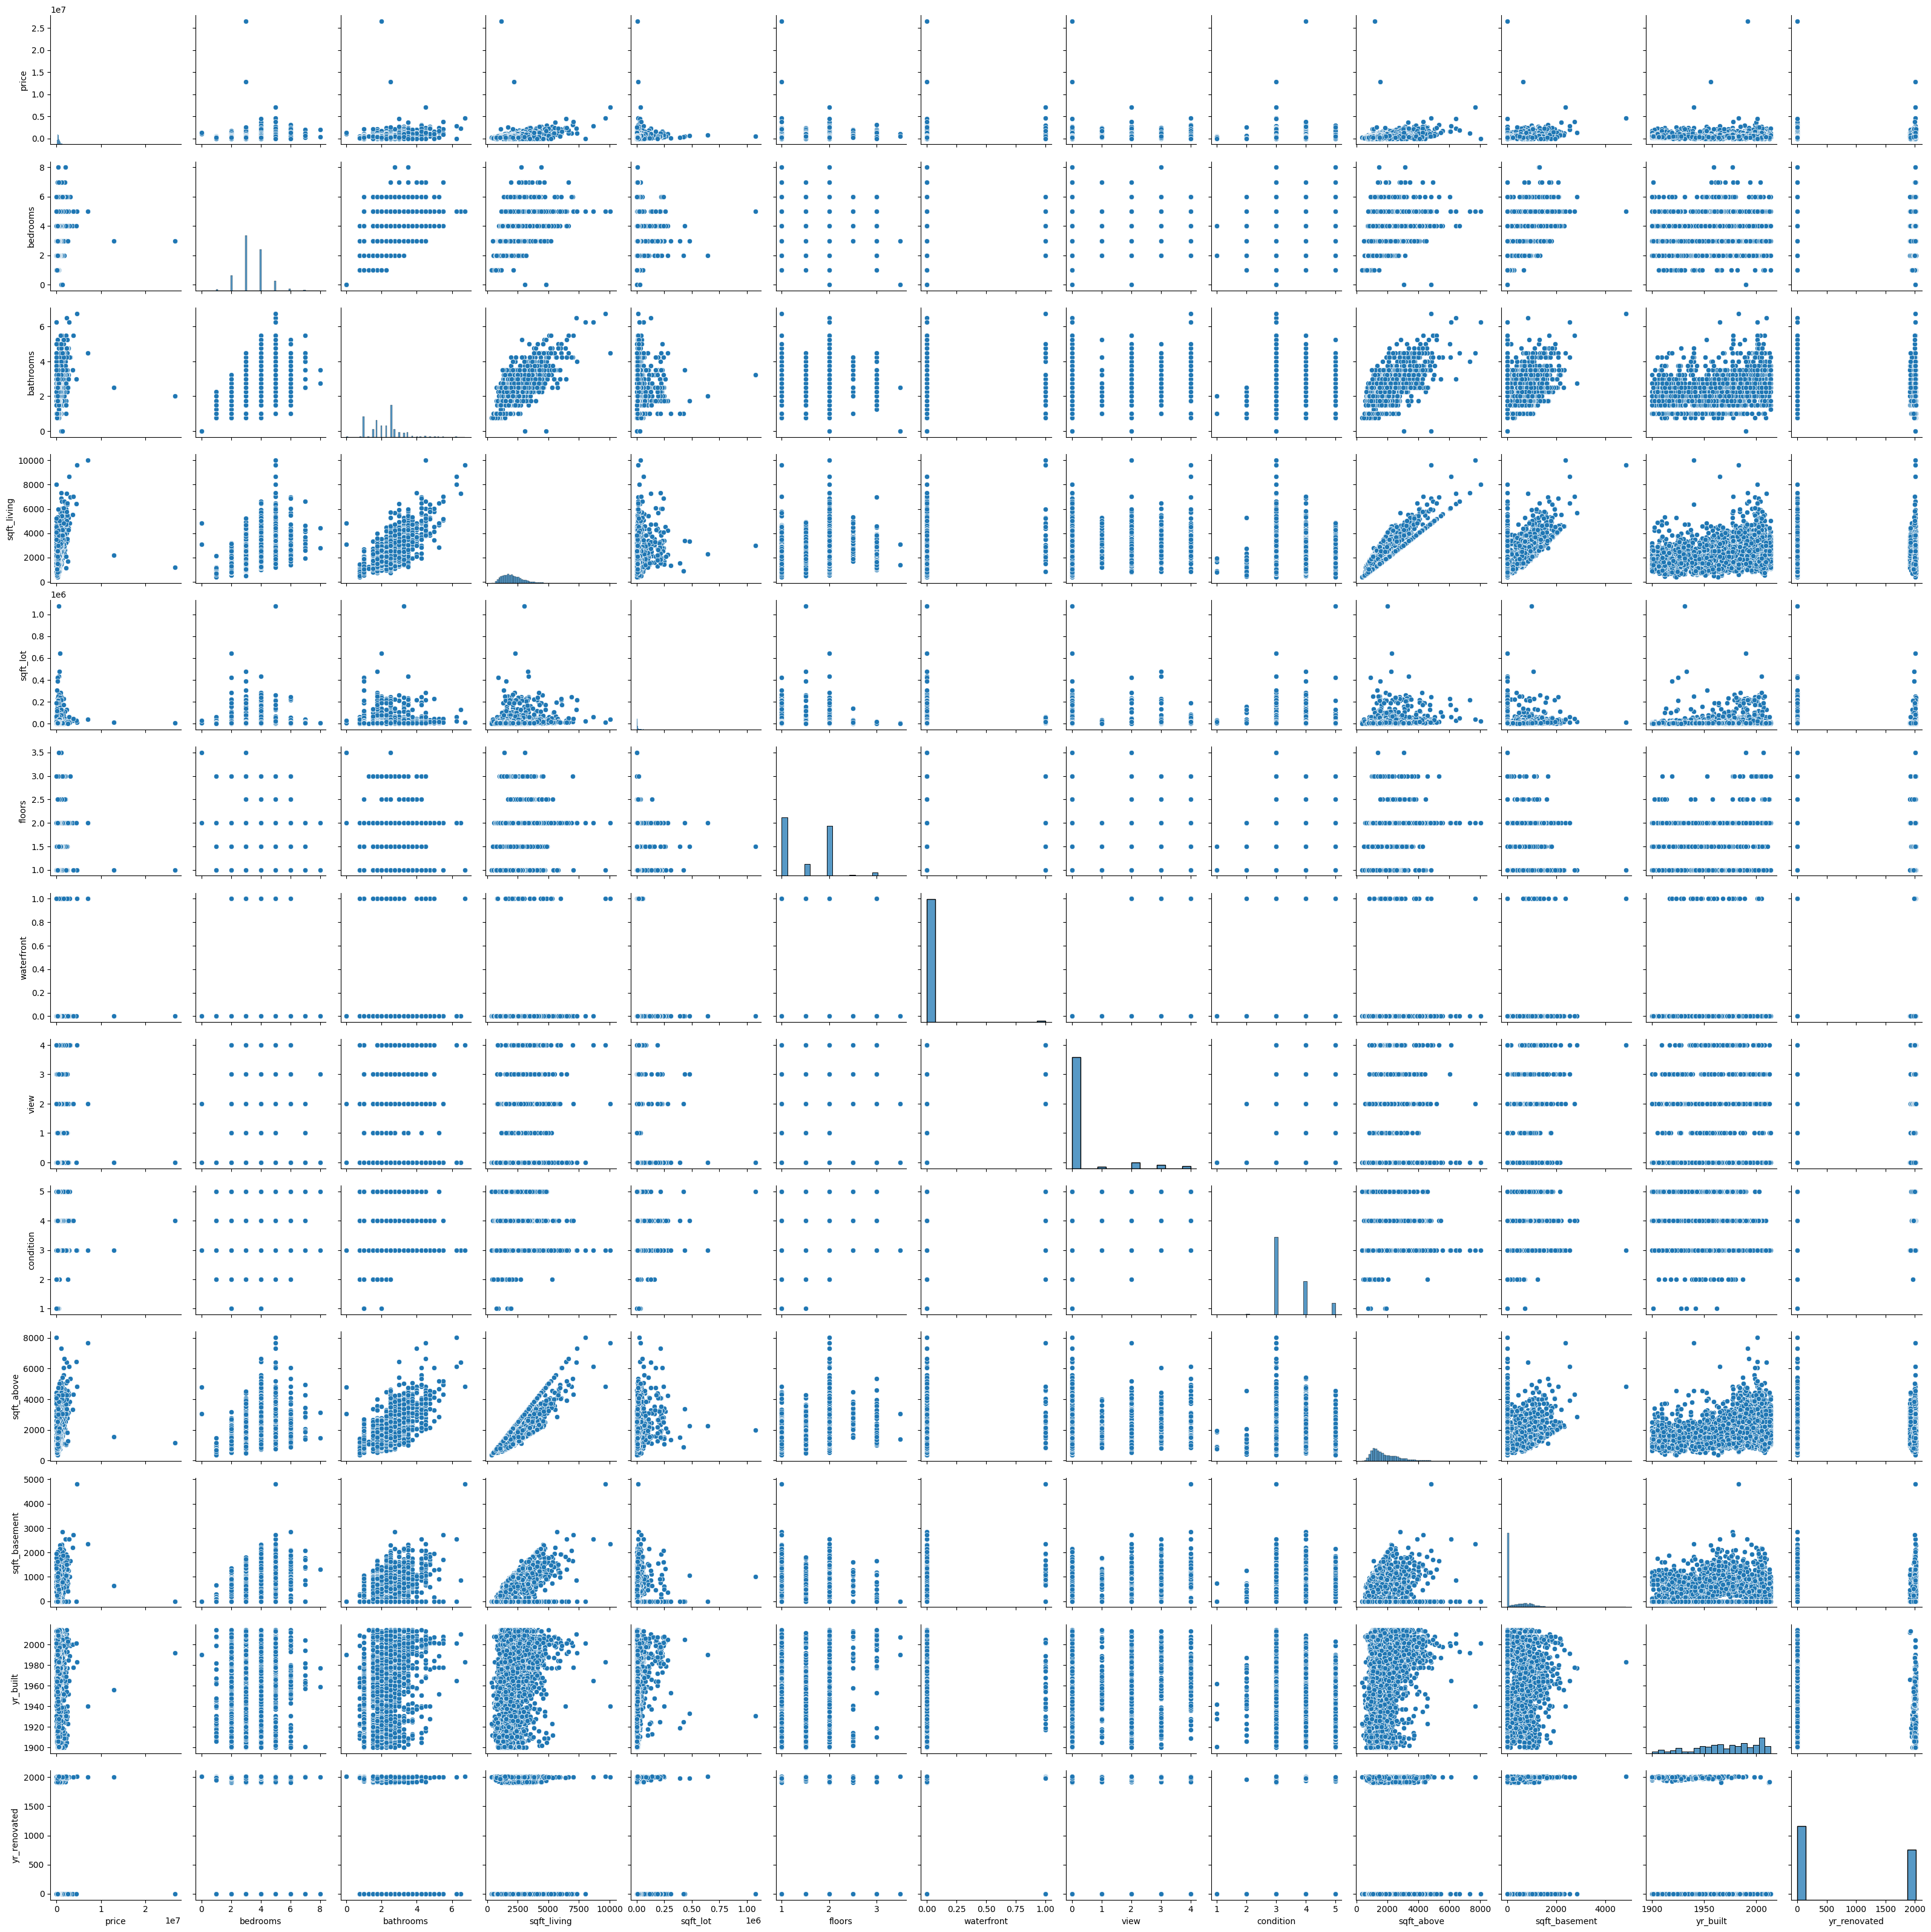

In [25]:
sns.pairplot(df)
plt.show()

### Conclusion
A strong positive linear relationship suggests that property price increases with square footage. <br />
A positive correlation, but with more scatter, indicates that the number of bedrooms and bathrooms generally influences price, but there's more variability. <br />
A negative correlation might suggest that older houses tend to be less expensive, but there could be exceptions. <br />
Scatterplots for each zipcode category could reveal price variations across different areas.